In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
frames = {}
cbfs = {}
cbvs = {}
mtts = {}
ttps = {}

In [3]:
for N0 in [100000, 200000, 1e+06]:
    with np.load('/home/dwu/trainData/Noise2Noise/train/ctp/results/simul/quantification/rmse_ssim_%g.npz'%N0, allow_pickle=True) as f:
        frames[N0] = f['frames'].item()
        cbfs[N0] = f['cbfs'].item()
        cbvs[N0] = f['cbvs'].item()
        mtts[N0] = f['mtts'].item()
        ttps[N0] = f['ttps'].item()

In [4]:
def Reorganize(res):
    vals = []
    for N0 in res:
        vals.append([res[N0][name] for name in res[N0]])
    vals = np.array(vals)
    vals = vals.transpose(2, 1, 0, 3)
    
    mvals = np.mean(vals, -1)
    svals = np.std(vals, -1)
    
    return mvals, svals

In [8]:
mvals, svals = Reorganize(cbfs)
print ((mvals[:, -1, :] - mvals[:,-2,:]) / mvals[:,-2,:])

[[-0.11988303 -0.09793518 -0.08859502]
 [ 0.02646011  0.01725432  0.0076798 ]]


In [9]:
mvals, svals = Reorganize(cbvs)
print ((mvals[:, -1, :] - mvals[:,-2,:]) / mvals[:,-2,:])

[[-0.13879415 -0.15092125 -0.11132107]
 [ 0.02401492  0.03032047  0.01429123]]


In [11]:
mvals, svals = Reorganize(mtts)
print ((mvals[:, -1, :] - mvals[:,-2,:]) / mvals[:,-2,:])

[[-0.21588649 -0.14179473 -0.02337285]
 [ 0.05787302  0.04882718  0.02377768]]


In [15]:
outDir = '/home/dwu/trainData/Noise2Noise/train/ctp/results/simul/quantification/'
if not os.path.exists(outDir):
    os.makedirs(outDir)

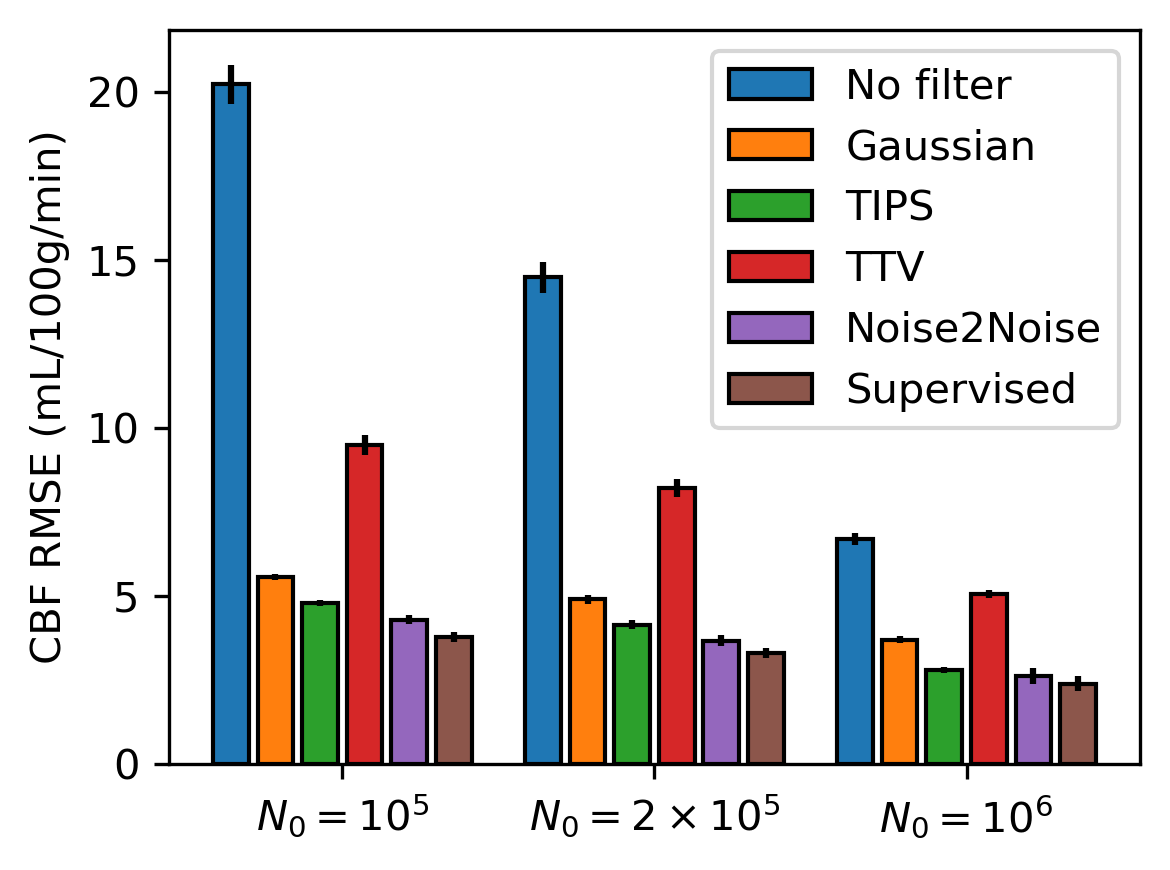

In [30]:
mvals, svals = Reorganize(cbfs)
plt.figure(figsize=[4,3], dpi=300)
for i in range(mvals.shape[1]):
    plt.bar(i + np.arange(mvals.shape[2]) * (mvals.shape[1]+1), mvals[0, i, :], edgecolor='k', yerr=svals[0, i, :])
plt.xticks([2.5, 9.5, 16.5], ['$N_0=10^5$', '$N_0=2\\times10^5$', '$N_0=10^6$'])
plt.ylabel('CBF RMSE (mL/100g/min)')
plt.legend(['No filter', 'Gaussian', 'TIPS', 'TTV', 'Noise2Noise', 'Supervised'])
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'cbf_rmse.png'))


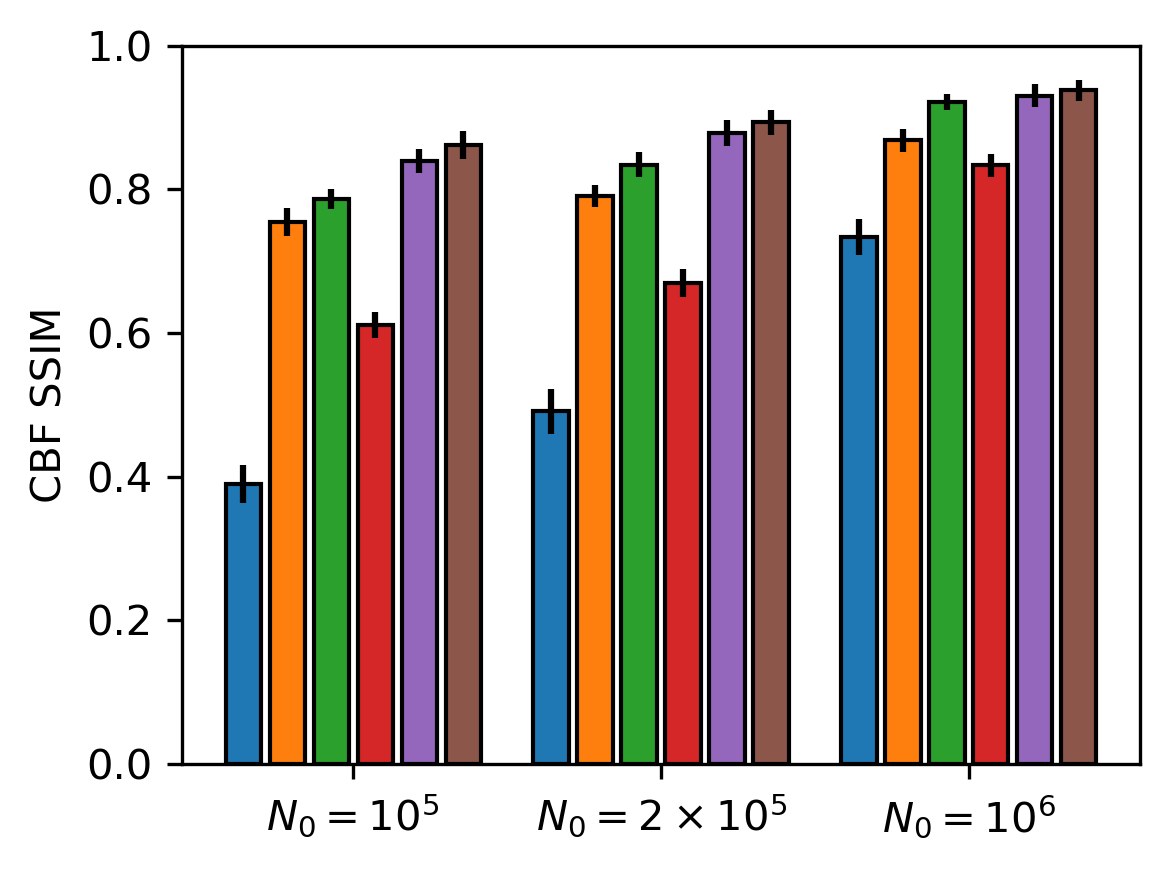

In [17]:
mvals, svals = Reorganize(cbfs)
plt.figure(figsize=[4,3], dpi=300)
for i in range(mvals.shape[1]):
    plt.bar(i + np.arange(mvals.shape[2]) * (mvals.shape[1]+1), mvals[1, i, :], edgecolor='k', yerr=svals[1, i, :])
plt.xticks([2.5, 9.5, 16.5], ['$N_0=10^5$', '$N_0=2\\times10^5$', '$N_0=10^6$'])
plt.ylabel('CBF SSIM')
plt.ylim([0,1])
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'cbf_ssim.png'))

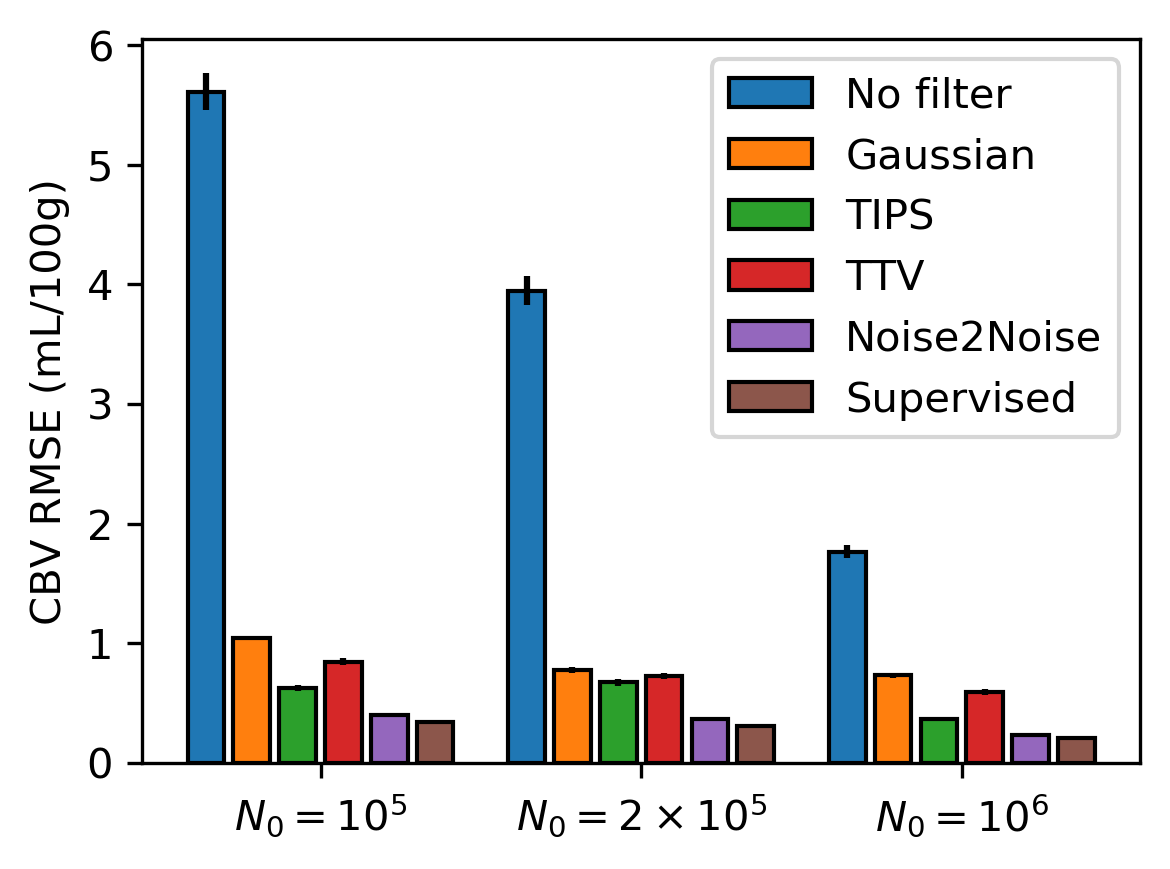

In [31]:
mvals, svals = Reorganize(cbvs)
plt.figure(figsize=[4,3], dpi=300)
for i in range(mvals.shape[1]):
    plt.bar(i + np.arange(mvals.shape[2]) * (mvals.shape[1]+1), mvals[0, i, :], edgecolor='k', yerr=svals[0, i, :])
plt.xticks([2.5, 9.5, 16.5], ['$N_0=10^5$', '$N_0=2\\times10^5$', '$N_0=10^6$'])
plt.ylabel('CBV RMSE (mL/100g)')
plt.legend(['No filter', 'Gaussian', 'TIPS', 'TTV', 'Noise2Noise', 'Supervised'])
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'cbv_rmse.png'))

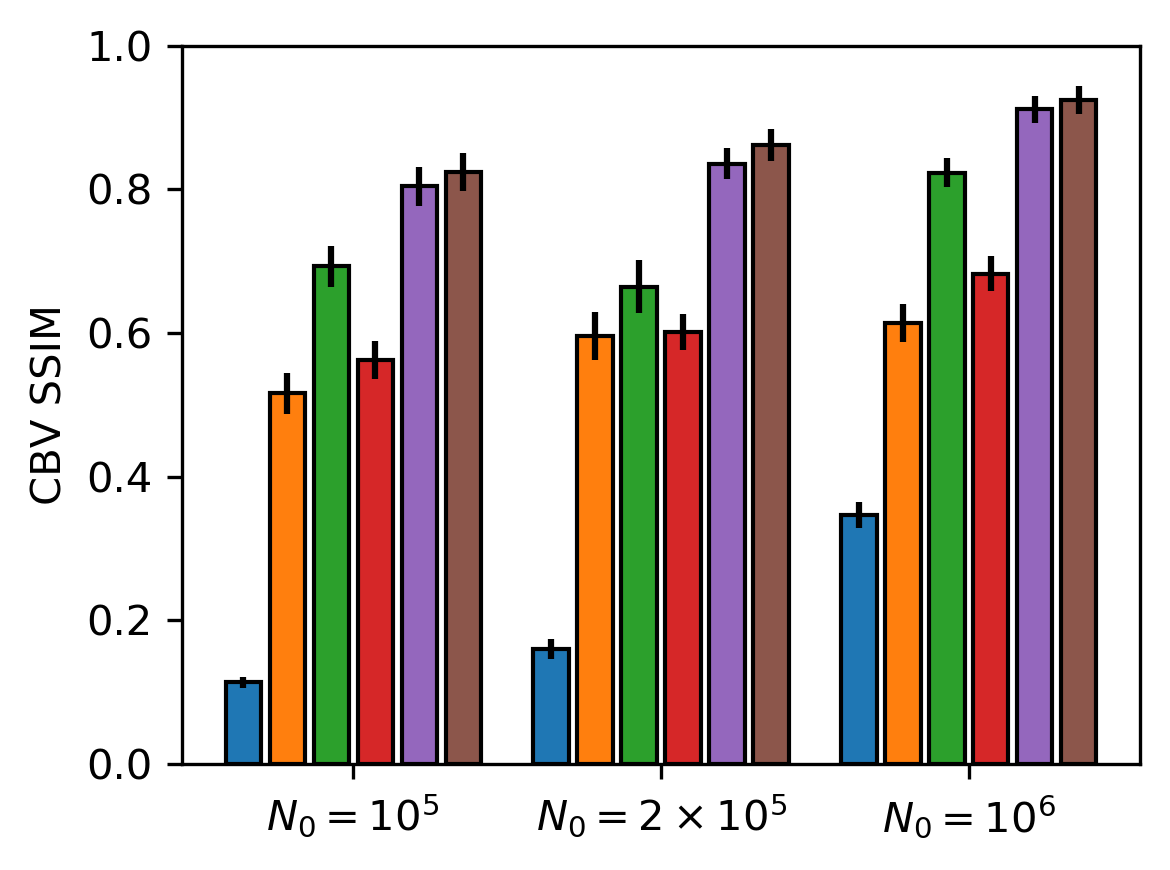

In [19]:
mvals, svals = Reorganize(cbvs)
plt.figure(figsize=[4,3], dpi=300)
for i in range(mvals.shape[1]):
    plt.bar(i + np.arange(mvals.shape[2]) * (mvals.shape[1]+1), mvals[1, i, :], edgecolor='k', yerr=svals[1, i, :])
plt.xticks([2.5, 9.5, 16.5], ['$N_0=10^5$', '$N_0=2\\times10^5$', '$N_0=10^6$'])
plt.ylabel('CBV SSIM')
plt.ylim([0,1])
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'cbv_ssim.png'))

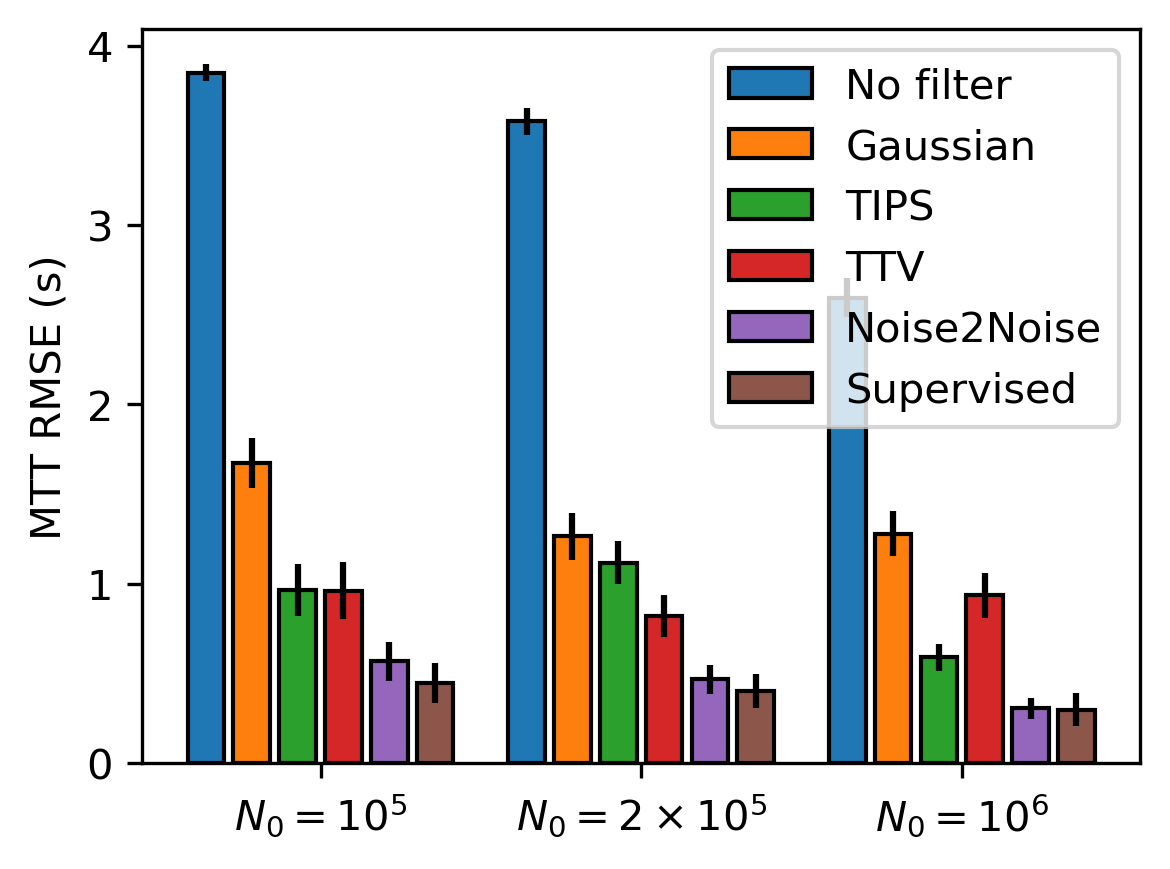

In [32]:
mvals, svals = Reorganize(mtts)
plt.figure(figsize=[4,3], dpi=300)
for i in range(mvals.shape[1]):
    plt.bar(i + np.arange(mvals.shape[2]) * (mvals.shape[1]+1), mvals[0, i, :], edgecolor='k', yerr=svals[0, i, :])
plt.xticks([2.5, 9.5, 16.5], ['$N_0=10^5$', '$N_0=2\\times10^5$', '$N_0=10^6$'])
plt.ylabel('MTT RMSE (s)')
plt.legend(['No filter', 'Gaussian', 'TIPS', 'TTV', 'Noise2Noise', 'Supervised'])
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'mtt_rmse.png'))

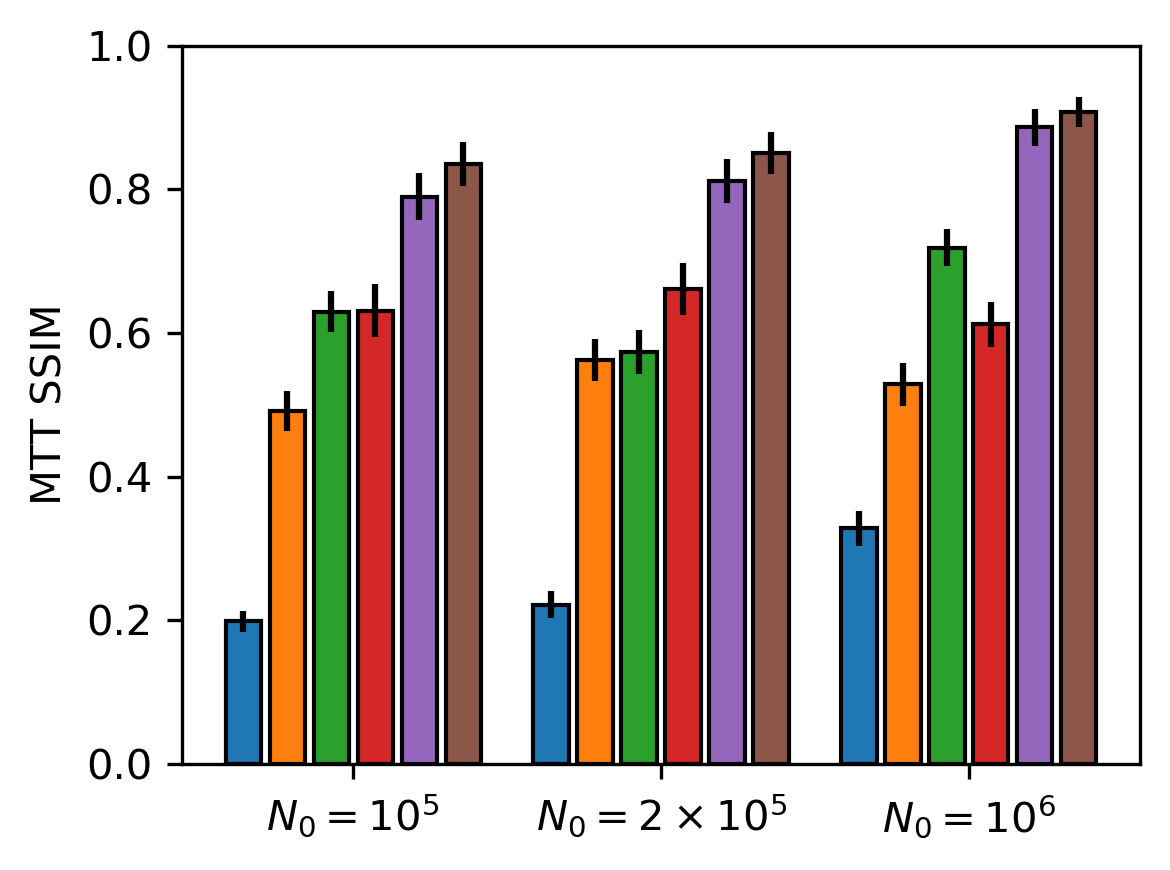

In [21]:
mvals, svals = Reorganize(mtts)
plt.figure(figsize=[4,3], dpi=300)
for i in range(mvals.shape[1]):
    plt.bar(i + np.arange(mvals.shape[2]) * (mvals.shape[1]+1), mvals[1, i, :], edgecolor='k', yerr=svals[1, i, :])
plt.xticks([2.5, 9.5, 16.5], ['$N_0=10^5$', '$N_0=2\\times10^5$', '$N_0=10^6$'])
plt.ylabel('MTT SSIM')
plt.ylim([0,1])
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'mtt_ssim.png'))

In [12]:
# plot rmse - time curve
vals = []
for N0 in frames:
    vals.append([frames[N0][name] for name in frames[N0]])
vals = np.array(vals)
vals = vals.transpose(2, 0, 1, 4, 3)

mvals = np.mean(vals, -1)

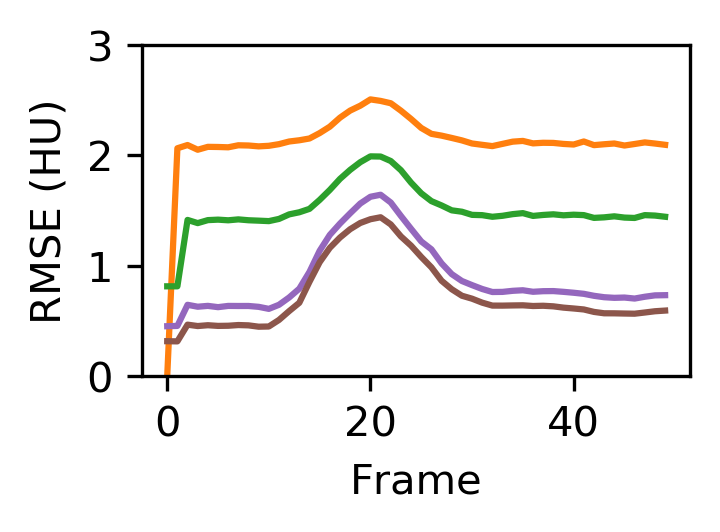

In [17]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [cycle[0], cycle[1], cycle[2], cycle[4], cycle[5]] # skip TV
plt.figure(figsize=[2.5,1.875], dpi=300)
for i in range(1, mvals.shape[2]):
    plt.plot(mvals[0, 0, i, :] * 150, colors[i])
plt.ylim([0, 3])
# plt.legend(['Gaussian', 'TIPS', 'Noise2Noise', 'Supervised'])
plt.xlabel('Frame')
plt.ylabel('RMSE (HU)')
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'rmse_time_100000.png'))

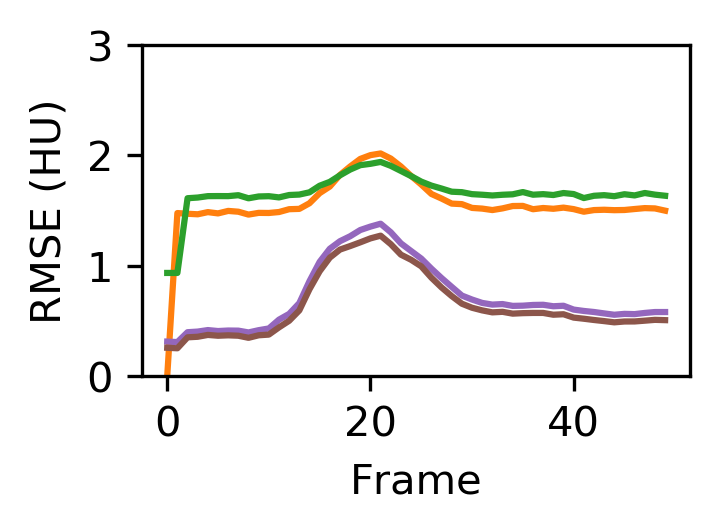

In [18]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [cycle[0], cycle[1], cycle[2], cycle[4], cycle[5]] # skip TV
plt.figure(figsize=[2.5,1.875], dpi=300)
for i in range(1, mvals.shape[2]):
    plt.plot(mvals[0, 1, i, :] * 150, colors[i])
plt.ylim([0, 3])
# plt.legend(['Gaussian', 'TIPS', 'Noise2Noise', 'Supervised'])
plt.xlabel('Frame')
plt.ylabel('RMSE (HU)')
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'rmse_time_200000.png'))

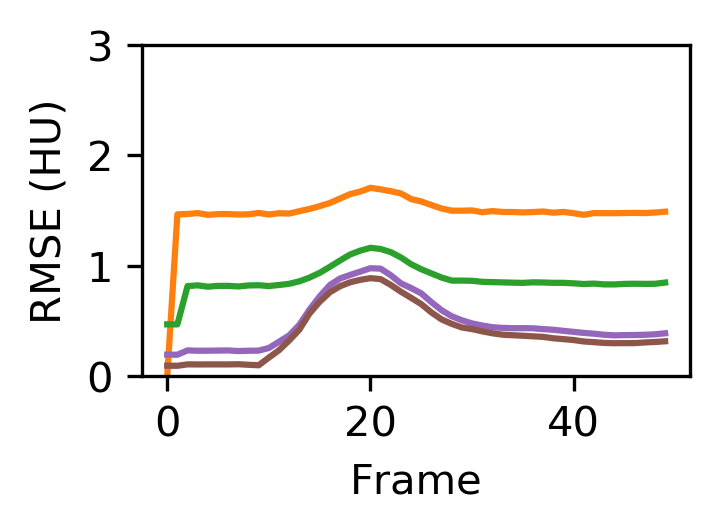

In [19]:
cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors = [cycle[0], cycle[1], cycle[2], cycle[4], cycle[5]] # skip TV
plt.figure(figsize=[2.5,1.875], dpi=300)
for i in range(1, mvals.shape[2]):
    plt.plot(mvals[0, 2, i, :] * 150, colors[i])
plt.ylim([0, 3])
# plt.legend(['Gaussian', 'TIPS', 'Noise2Noise', 'Supervised'])
plt.xlabel('Frame')
plt.ylabel('RMSE (HU)')
plt.tight_layout()
plt.savefig(os.path.join(outDir, 'rmse_time_1e+06.png'))